In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
def prior_kernel(s,t):
    return np.exp(-(t-s)**2)

In [3]:
class posterior:
    def __init__(self, T, x, y, prior_kernel,sigma):
        self.T = T
        self.x = x
        self.y = y
        self.prior_kernel = prior_kernel
        self.n = y.shape[0]
        self.g = T.shape[0]
        self.sigma = sigma
        self.K = np.fromfunction(np.vectorize(lambda s, t: self.prior_kernel(self.T[s], self.T[t])), (self.g, self.g), dtype=int)
    
    def Lx(self,t):   
        L = np.zeros(self.n)    
        for i in np.arange(0,self.n):
            L[i] = np.trapz(self.K[t, :] * self.x[i,:], self.T)
        return L
        
    def R(self,i, j):
        Ri = np.trapz(self.K[:, :] * self.x[i, :], self.T, axis=1)
        Rij = np.trapz(Ri * self.x[j, :],self.T)
        return Rij

    def cov(self):
        return np.array([[self.R(i, j) for j in range(self.n)] for i in range(self.n)])
    
    # return m(t) and K*(s,t) for every s,t in T (TODO)
    def posterior_mean_cov(self):
        inv = np.linalg.inv(self.cov() + self.sigma * np.identity(self.n))
        def m(t):
            mean = np.dot(np.dot(np.transpose(self.Lx(t)),inv),self.y)
            return mean
        def Kstar(s,t):
            cov = self.K[s,t] - np.dot(np.dot(np.transpose(self.Lx(s)),inv),self.Lx(t))
            return cov
        
        m = np.fromfunction(np.vectorize(lambda t: m(t)), (self.g,), dtype=int)
        C = np.fromfunction(np.vectorize(lambda t, s: Kstar(s,t)), (self.g,self.g), dtype=int)
        return m,C
    
    def only_mean(self):
        inv = np.linalg.inv(self.cov() + self.sigma * np.identity(self.n))
        def m(t):
            mean = np.dot(np.dot(np.transpose(self.Lx(t)),inv),self.y)
            return mean
        m = np.fromfunction(np.vectorize(lambda t: m(t)), (self.g,), dtype=int)
        return m
    
    def fitted_values(self):
        m = self.only_mean()
        return np.fromfunction(np.vectorize(lambda i: np.trapz(self.x[i,:]*m,self.T)), (self.n,), dtype=int)

In [5]:
data = pd.read_csv("./data/preprocessed_curves_1.csv")

/var/folders/3r/3q1_vr0n5g96wct6_zhpvb600000gn/T/ipykernel_6901/2092281405.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/preprocessed_curves_1.csv")


In [6]:
data.iloc[:10, :]

,idx,0,1,2,3,4,5,6,7,8,...,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492
0,severity,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1,constancy,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
2,age,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
3,gender,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
4,payed,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,activity,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
6,0,-0.164457,-0.177098,-0.108308,-0.123934,-0.177251,-0.150429,-0.126582,-0.109892,-0.200531,...,-0.241825,-0.234537,-0.235916,-0.279393,-0.173486,-0.218630,-0.233063,-0.236168,-0.243895,-0.276548
7,1,-0.418351,-0.450636,-0.275842,-0.315433,-0.452692,-0.383553,-0.322063,-0.281685,-0.510927,...,-0.603797,-0.586797,-0.587965,-0.698545,-0.316568,-0.547837,-0.582074,-0.591066,-0.612054,-0.692433
8,2,-0.536672,-0.578056,-0.354026,-0.404720,-0.580950,-0.491968,-0.413178,-0.361464,-0.655542,...,-0.797149,-0.773082,-0.774713,-0.920413,-0.412169,-0.722936,-0.766478,-0.778814,-0.806516,-0.913221
9,3,-0.587290,-0.632533,-0.387533,-0.442941,-0.635757,-0.538194,-0.452164,-0.395433,-0.717387,...,-0.874719,-0.846146,-0.848470,-1.007766,-0.446843,-0.792548,-0.837954,-0.852649,-0.882828,-0.999829


In [24]:
data1 = data.iloc[:, np.random.permutation(np.arange(6494))]
data1

,6340,5586,1695,5389,2101,4071,1296,1301,2428,5537,...,4745,4546,2319,749,179,5095,315,3931,3093,6121
0,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000
1,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
2,67.000000,72.000000,51.000000,54.000000,67.000000,47.000000,67.000000,67.000000,52.000000,66.000000,...,55.000000,73.000000,62.000000,51.000000,70.000000,45.000000,74.000000,53.000000,63.000000,49.000000
3,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.548927,-0.445139,-0.326951,-0.330327,-0.735769,-0.101793,-1.275553,-1.267879,0.053769,-0.145598,...,-0.355021,-0.372586,1.007520,-0.333248,-0.685062,-0.829446,-1.144478,-0.536943,-0.409424,-0.350953
290,-0.534221,-0.444983,-0.326910,-0.330327,-0.735789,-0.109170,-1.271249,-1.260780,0.058197,-0.145627,...,-0.355095,-0.372589,1.020309,-0.341152,-0.685061,-0.829481,-1.234804,-0.537565,-0.409422,-0.350960
291,-0.522084,-0.444998,-0.340001,-0.330327,-0.735809,-0.117478,-1.277825,-1.258213,0.062365,-0.145624,...,-0.355185,-0.372591,1.009832,-0.341852,-0.685061,-0.829501,-1.253059,-0.538187,-0.409421,-0.350975
292,-0.542076,-0.445050,-0.379454,-0.330327,-0.735827,-0.125574,-1.282554,-1.265895,0.066366,-0.145622,...,-0.355272,-0.372592,0.950690,-0.342287,-0.685061,-0.829504,-1.269207,-0.538808,-0.409426,-0.351006


In [66]:
y = data1.iloc[0, 1:500]
y = y.to_numpy()

x = data1.iloc[6:, 1:500]
x = x.T
x = x.to_numpy()

sigma = 1
T = np.linspace(0, 1, 288)

In [67]:
model = posterior(T, x, y, prior_kernel,sigma)

In [68]:
fitted = model.fitted_values()

Text(0, 0.5, 'Predicted Target')

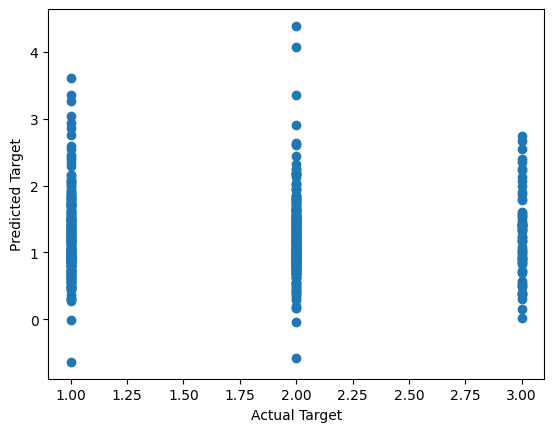

In [69]:
plt.scatter(y,fitted)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')

In [70]:
logit_fitted = scipy.special.expit(fitted)

Text(0, 0.5, 'Predicted Target')

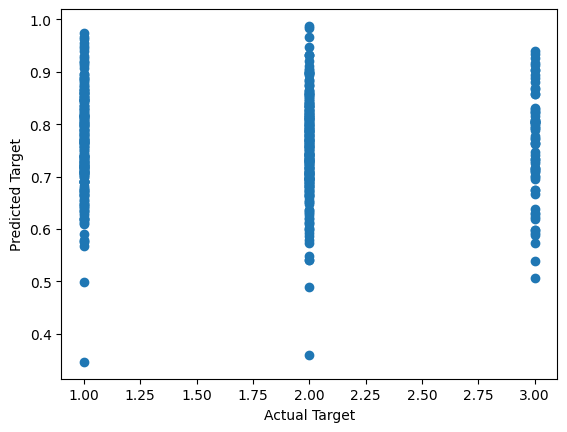

In [71]:
plt.scatter(y,logit_fitted)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')

In [60]:
alphas = np.linspace(0.3, 0.7, 10)
errors = np.zeros(len(alphas))

for alpha in alphas:
    labels = np.ones(len(logit_fitted))
    others = np.where(logit_fitted > alpha)
    labels[others] = np.ones(len(others)) * 2
    errors[np.where(alphas == alpha)] = np.sum(np.abs(labels-y))/len(y)
    

In [61]:
labels = np.ones(len(logit_fitted))
others = np.where(logit_fitted > alphas[5])
labels[others] = np.ones(len(others)) * 2


In [62]:
errors

array([0.59183673, 0.59183673, 0.59183673, 0.59183673, 0.59183673,
       0.6122449 , 0.67346939, 0.71428571, 0.71428571, 0.7755102 ])

In [64]:
labels

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [65]:
alphas[5]

0.5222222222222221

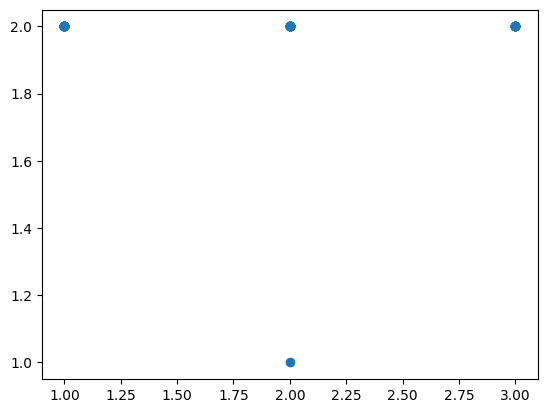

In [63]:
plt.scatter(y, labels)